In [25]:
import pandas as pd

# Load the dataset
df = pd.read_csv('SniperDataset.csv')

# Display the first few rows to understand the structure
df.head()


,DistanceFromTarget,ElevationDifference,GunTiltX,GunTiltY,XDifference,YDifference,Zdifference,HitOrMiss
0,12.87349,1.599588,59.15903,34.22291,12.197980,1.599588,3.791748,0
1,13.31874,1.448012,90.27212,167.90610,-12.768570,1.448012,3.500809,0
2,16.03959,1.496659,72.67087,158.94470,-15.600770,1.496659,3.412395,0
3,42.36864,1.486309,74.63644,73.78157,8.890849,1.486309,41.398610,0
4,42.32843,1.454168,83.85080,155.37560,-38.471610,1.454168,17.593090,0


In [26]:
# Check dataset info (data types, null values)
df.info()

# Get summary statistics for numerical columns
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13735 entries, 0 to 13734
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DistanceFromTarget   13735 non-null  float64
 1   ElevationDifference  13735 non-null  float64
 2   GunTiltX             13735 non-null  float64
 3   GunTiltY             13735 non-null  float64
 4   XDifference          13735 non-null  float64
 5   YDifference          13735 non-null  float64
 6   Zdifference          13735 non-null  float64
 7   HitOrMiss            13735 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 858.6 KB


DistanceFromTarget     0
ElevationDifference    0
GunTiltX               0
GunTiltY               0
XDifference            0
YDifference            0
Zdifference            0
HitOrMiss              0
dtype: int64

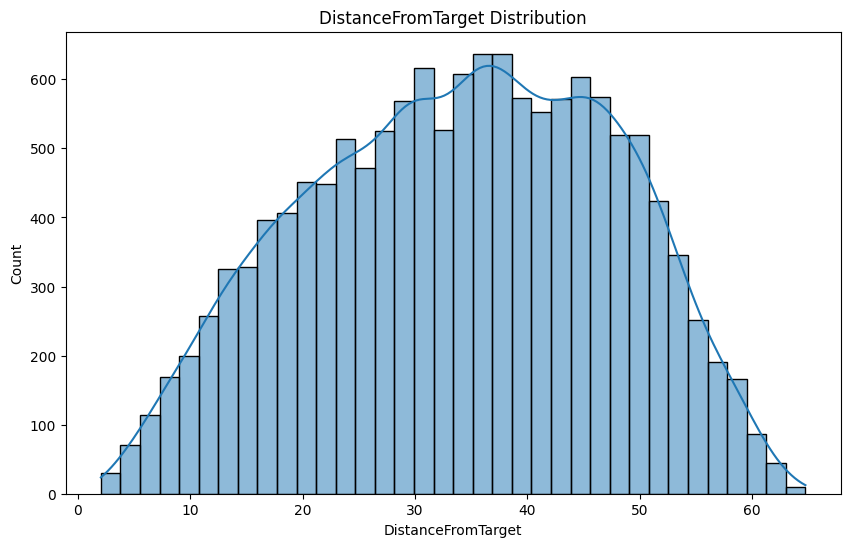

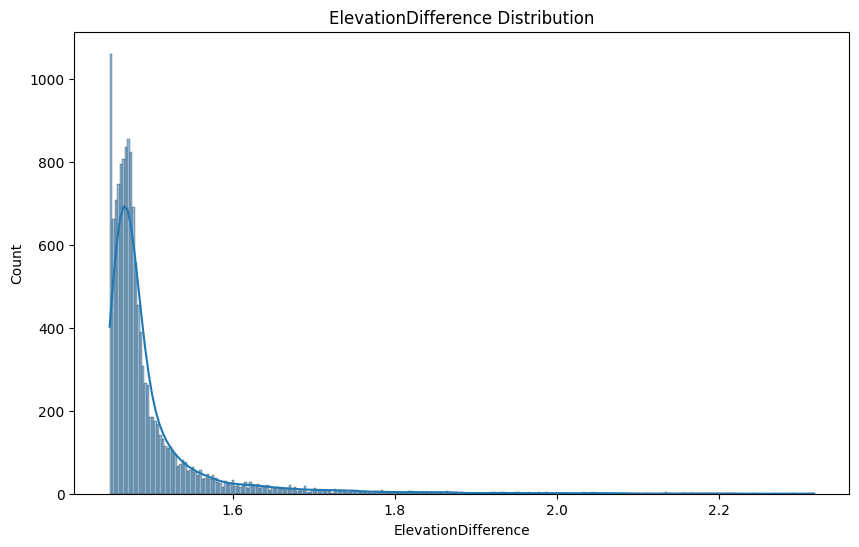

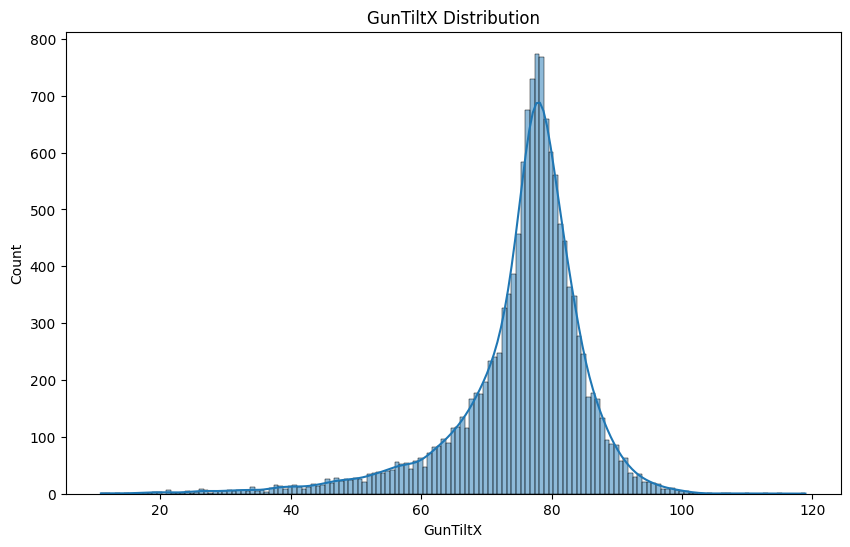

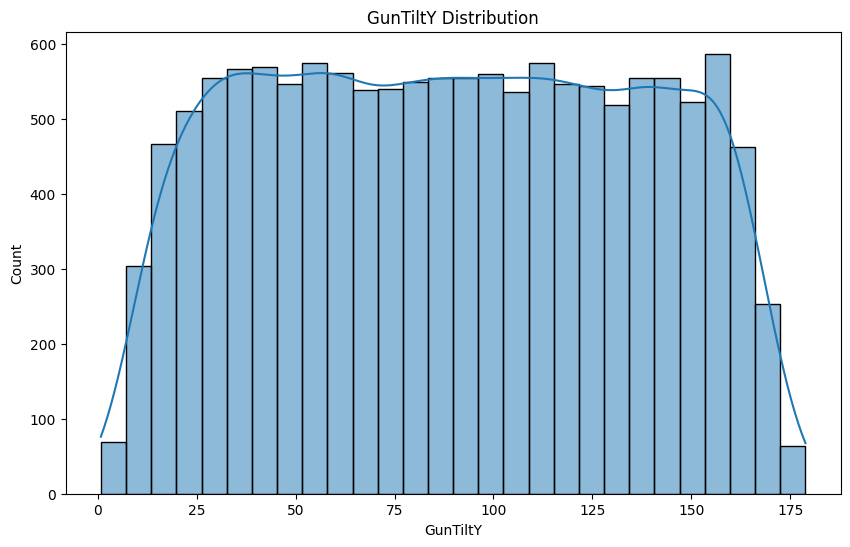

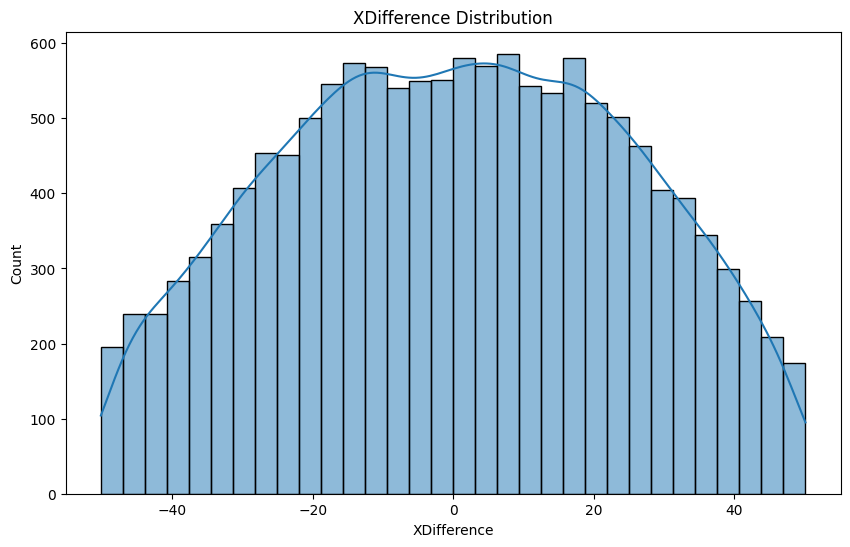

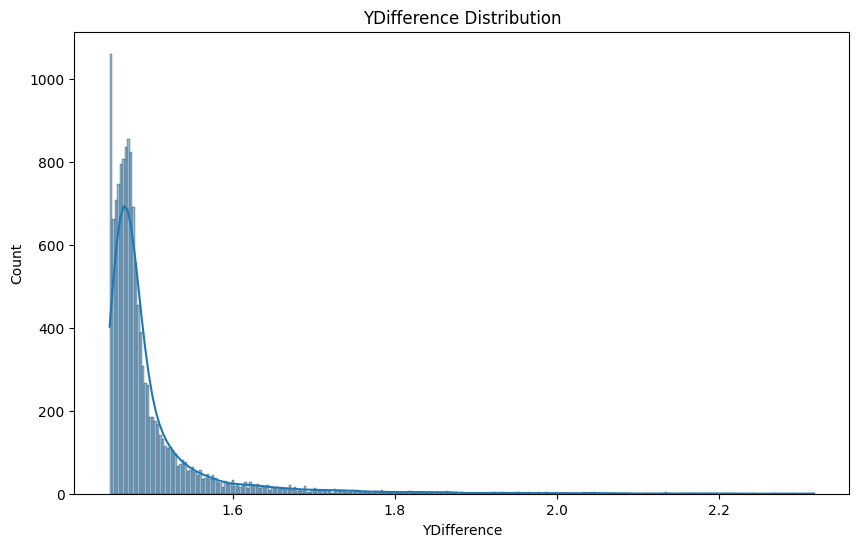

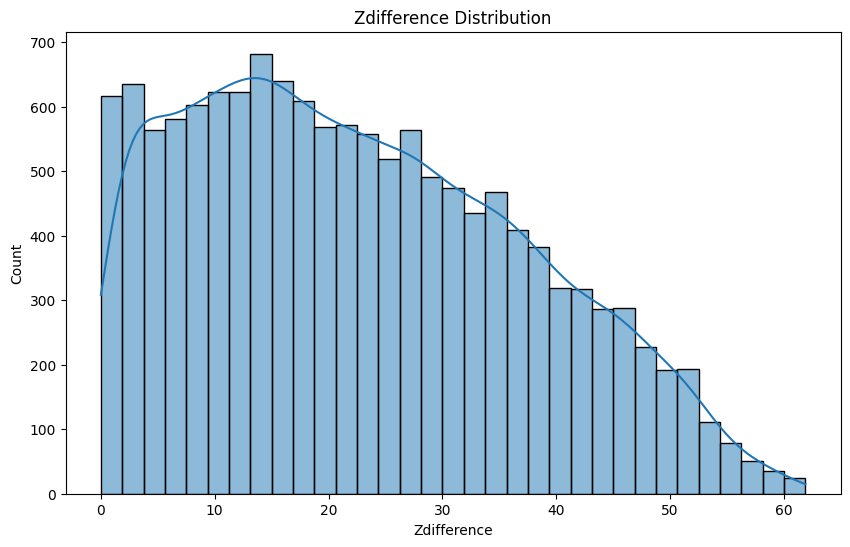

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
numerical_features = ['DistanceFromTarget', 'ElevationDifference', 'GunTiltX', 'GunTiltY', 'XDifference', 'YDifference', 'Zdifference']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')
    plt.show()


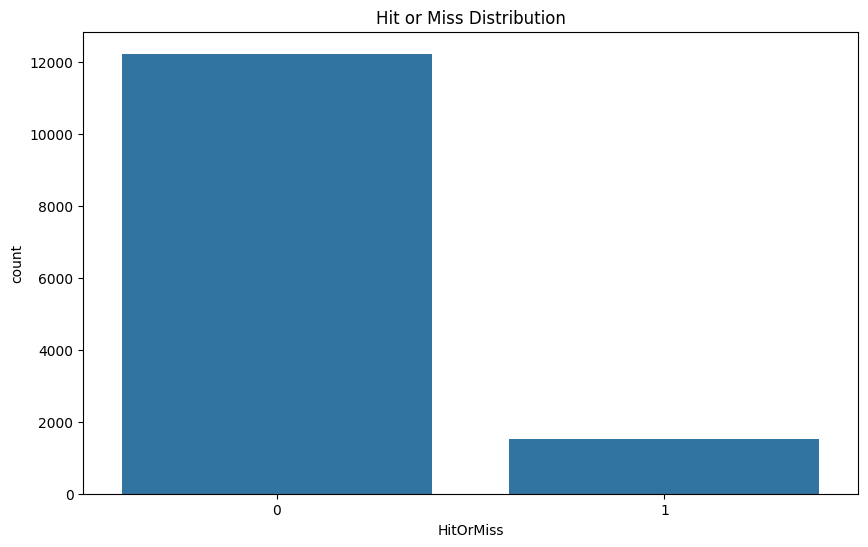

In [28]:
# Plot the distribution of the target variable (HitOrMiss)
plt.figure(figsize=(10, 6))
sns.countplot(x='HitOrMiss', data=df)
plt.title('Hit or Miss Distribution')
plt.show()


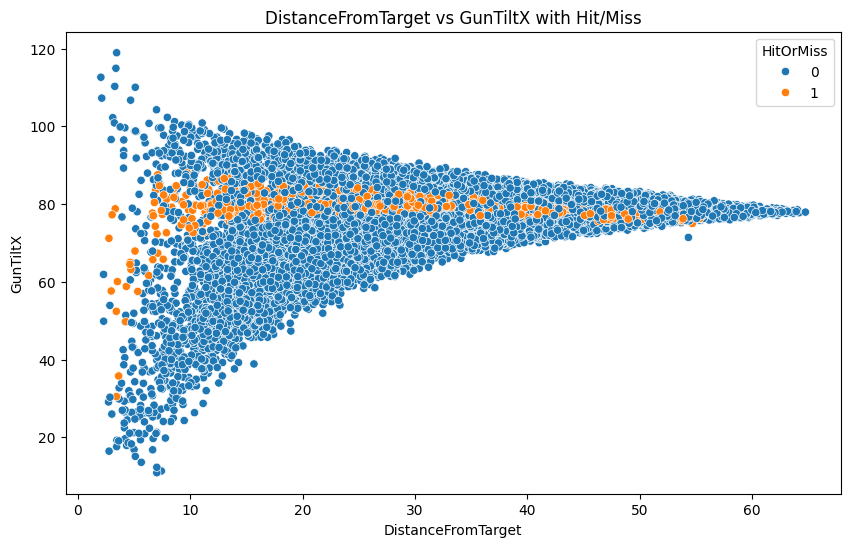

In [29]:
# Scatter plot of DistanceFromTarget vs GunTiltX
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DistanceFromTarget', y='GunTiltX', hue='HitOrMiss', data=df)
plt.title('DistanceFromTarget vs GunTiltX with Hit/Miss')
plt.show()


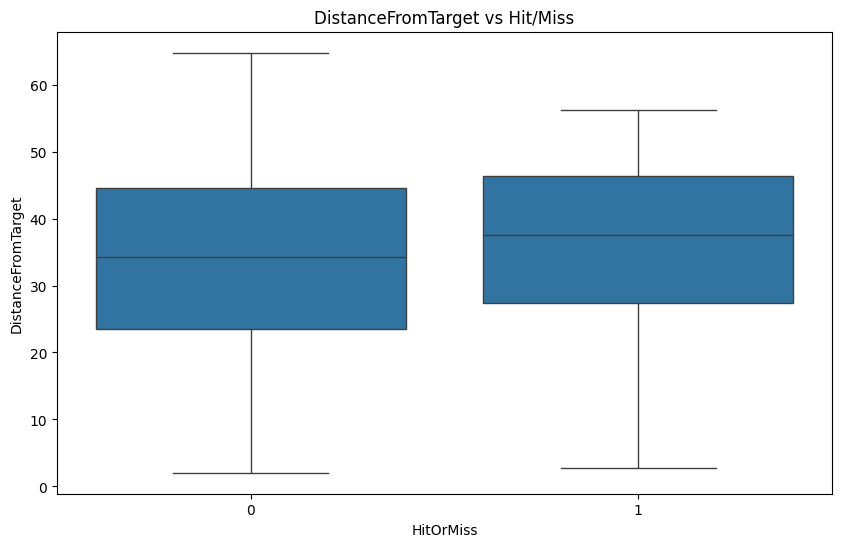

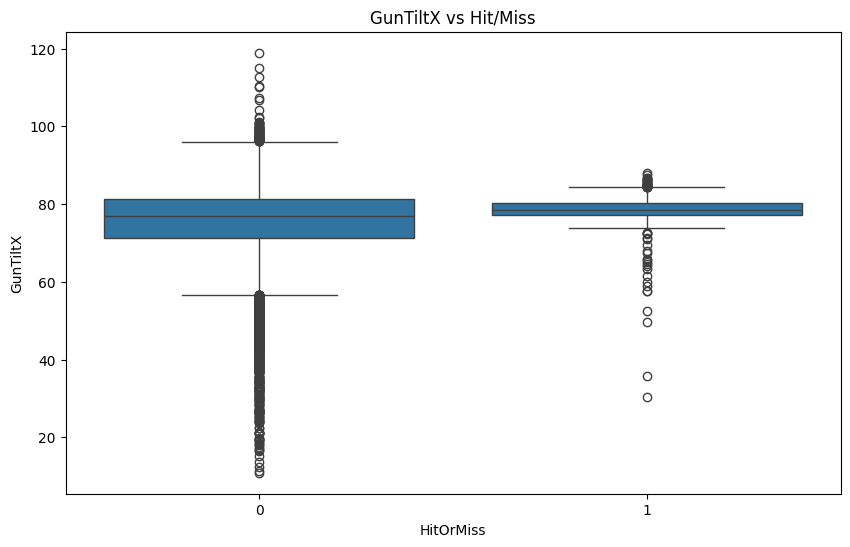

In [30]:
# Box plot of DistanceFromTarget vs HitOrMiss
plt.figure(figsize=(10, 6))
sns.boxplot(x='HitOrMiss', y='DistanceFromTarget', data=df)
plt.title('DistanceFromTarget vs Hit/Miss')
plt.show()

# Box plot of GunTiltX vs HitOrMiss
plt.figure(figsize=(10, 6))
sns.boxplot(x='HitOrMiss', y='GunTiltX', data=df)
plt.title('GunTiltX vs Hit/Miss')
plt.show()


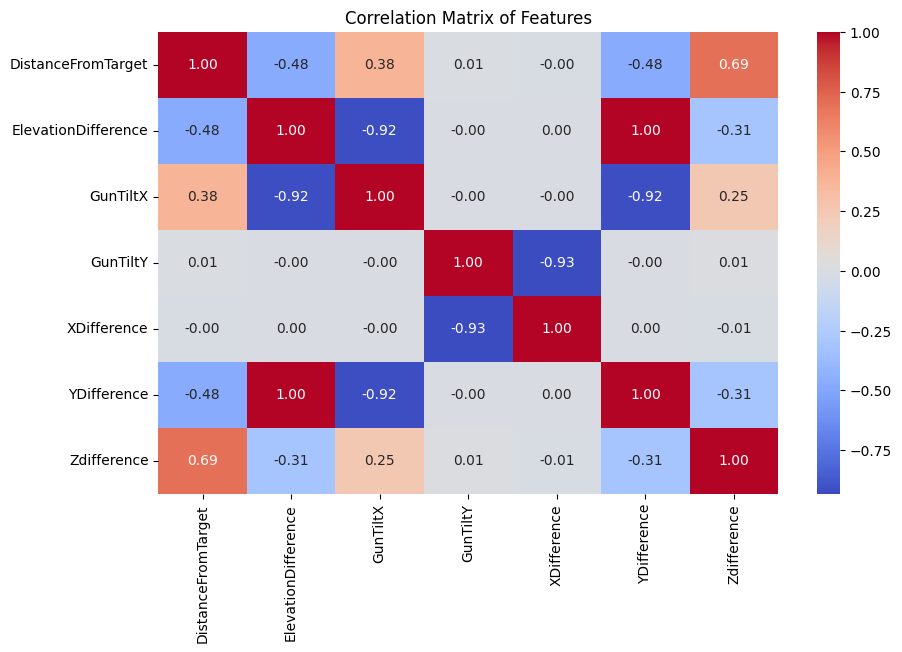

In [31]:
# Correlation matrix of continuous features
corr = df[['DistanceFromTarget', 'ElevationDifference', 'GunTiltX', 'GunTiltY', 'XDifference', 'YDifference', 'Zdifference']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()


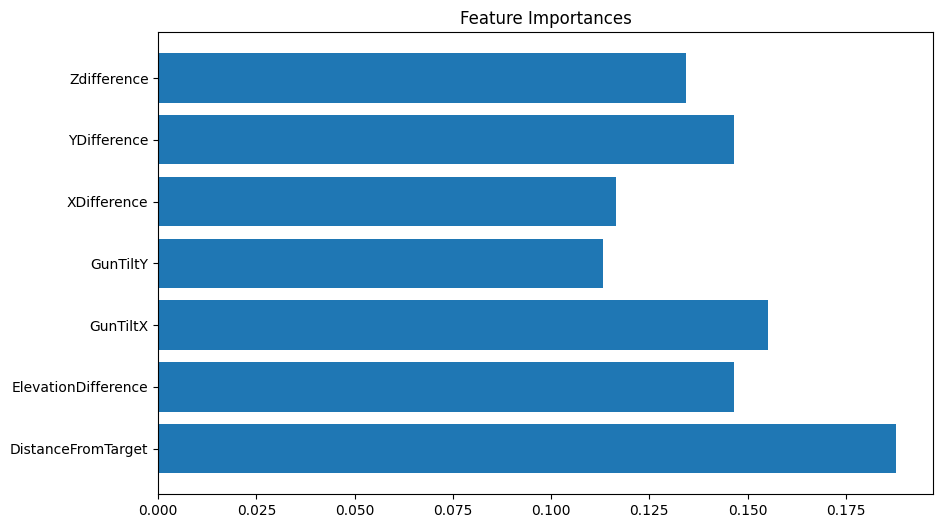

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Define features (X) and target variable (y)
X = df[['DistanceFromTarget', 'ElevationDifference', 'GunTiltX', 'GunTiltY', 'XDifference', 'YDifference', 'Zdifference']]
y = df['HitOrMiss']

# Train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Plot feature importances
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title('Feature Importances')
plt.show()


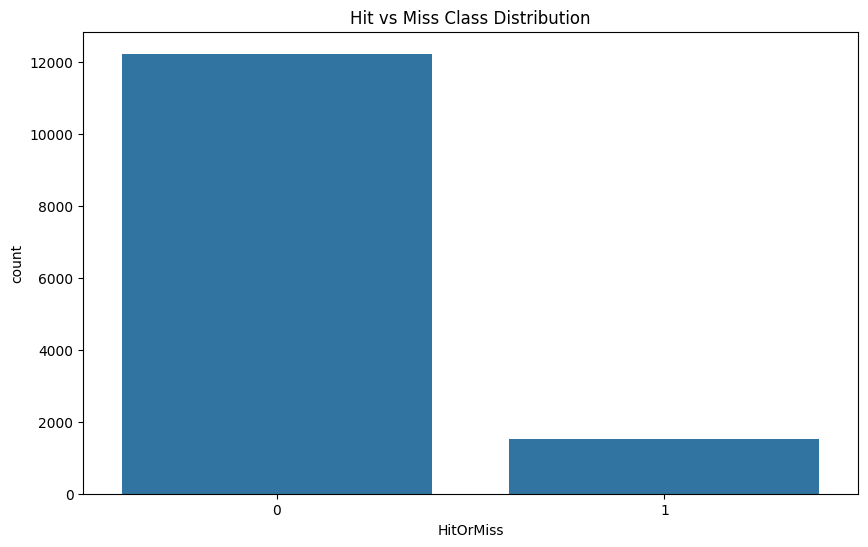

In [33]:
# Visualizing class imbalance
plt.figure(figsize=(10, 6))
sns.countplot(x='HitOrMiss', data=df)
plt.title('Hit vs Miss Class Distribution')
plt.show()

# Optionally, you could apply techniques like SMOTE for balancing classes.



--- Loading Models and Running Predictions ---

Predicting with Baseline Random Forest:
Predicting: |██████████████████████████████████████████████████| 100.0% Complete
Accuracy for Baseline RF: 0.7260

Confusion Matrix for Baseline RF:
[[1742, 702], [51, 253]]

Classification Report for Baseline RF:
Class 0: {'precision': 0.9715560513106526, 'recall': 0.7127659574468085, 'f1-score': 0.8222799150342224, 'support': 2444}
Class 1: {'precision': 0.2649214659685864, 'recall': 0.8322368421052632, 'f1-score': 0.40190627482128677, 'support': 304}

Predicting with Oversampled Random Forest:
Predicting: |██████████████████████████████████████████████████| 100.0% Complete
Accuracy for Oversampled RF: 0.7245

Confusion Matrix for Oversampled RF:
[[1724, 720], [37, 267]]

Classification Report for Oversampled RF:
Class 0: {'precision': 0.9789892106757524, 'recall': 0.7054009819967266, 'f1-score': 0.8199762187871581, 'support': 2444}
Class 1: {'precision': 0.270516717325228, 'recall': 0.8782894736

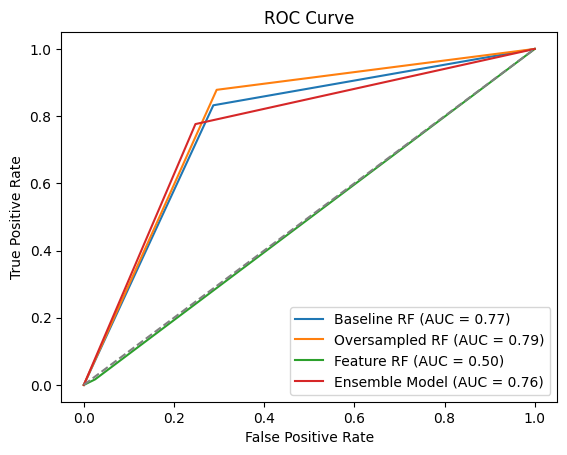

In [6]:
import pickle
import csv
import math
import random
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.metrics import roc_curve, auc, accuracy_score
from RandomForest import DecisionTreeClassifier, RandomForestClassifier

# Load a saved model
def load_model(filename):
    with open(filename, 'rb') as f:
        model = pickle.load(f)
    return model

# Load the dataset (as done during training)
def load_csv(file_path):
    with open(file_path, 'r') as f:
        reader = csv.reader(f)
        data = list(reader)
    header = data[0]
    data = data[1:]  # Exclude header
    # Convert strings to float
    for i in range(len(data)):
        data[i] = [float(x) for x in data[i]]
    return header, data

# Extract features and labels
def extract_features_labels(data, feature_indices, label_index):
    X = []
    y = []
    for row in data:
        X.append([row[i] for i in feature_indices])
        y.append(int(row[label_index]))
    return X, y

# Standardize features
def standardize_features(X):
    n_samples = len(X)
    n_features = len(X[0])
    means = [0.0] * n_features
    stds = [0.0] * n_features

    # Calculate means
    for i in range(n_features):
        means[i] = sum([X[j][i] for j in range(n_samples)]) / n_samples

    # Calculate standard deviations
    for i in range(n_features):
        stds[i] = math.sqrt(sum([(X[j][i] - means[i]) ** 2 for j in range(n_samples)]) / n_samples)

    # Standardize
    for i in range(n_samples):
        for j in range(n_features):
            if stds[j] != 0:
                X[i][j] = (X[i][j] - means[j]) / stds[j]
            else:
                X[i][j] = 0.0
    return X

# Train/Test split
def train_test_split(X, y, test_size=0.2, stratify=False):
    data = list(zip(X, y))
    if stratify:
        # Stratified split
        label_to_data = defaultdict(list)
        for x_i, y_i in data:
            label_to_data[y_i].append((x_i, y_i))
        train_data = []
        test_data = []
        for label, items in label_to_data.items():
            split_idx = int(len(items) * (1 - test_size))
            train_data.extend(items[:split_idx])
            test_data.extend(items[split_idx:])
    else:
        random.shuffle(data)
        split_idx = int(len(data) * (1 - test_size))
        train_data = data[:split_idx]
        test_data = data[split_idx:]
    X_train, y_train = zip(*train_data)
    X_test, y_test = zip(*test_data)
    return list(X_train), list(X_test), list(y_train), list(y_test)

# Confusion Matrix
def confusion_matrix(y_true, y_pred):
    unique_classes = sorted(set(y_true))
    matrix = [[0 for _ in unique_classes] for _ in unique_classes]
    class_to_index = {cls: idx for idx, cls in enumerate(unique_classes)}
    for true, pred in zip(y_true, y_pred):
        i = class_to_index[true]
        j = class_to_index[pred]
        matrix[i][j] += 1
    return matrix, unique_classes

# Classification Report
def classification_report(y_true, y_pred):
    matrix, classes = confusion_matrix(y_true, y_pred)
    report = {}
    for idx, cls in enumerate(classes):
        tp = matrix[idx][idx]
        fp = sum([matrix[i][idx] for i in range(len(classes)) if i != idx])
        fn = sum([matrix[idx][i] for i in range(len(classes)) if i != idx])
        tn = sum([matrix[i][j] for i in range(len(classes)) for j in range(len(classes)) if i != idx and j != idx])
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
        support = tp + fn
        report[cls] = {
            'precision': precision,
            'recall': recall,
            'f1-score': f1_score,
            'support': support
        }
    return report

# ROC Curve Calculation
def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    return roc_auc

# ROC Curve Calculation
def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    return roc_auc
    
def check_model_metrics():
    print("\n--- Checking Metrics for Feature Selected Model ---")
    
    # Load the feature selected model
    rf_feature_selected_loaded = load_model("rf_feature_selected_model.pkl")
    
    # Make predictions using the loaded model
    y_pred_feature_selected_loaded = rf_feature_selected_loaded.predict(X_test)
    
    # Compute confusion matrix and classification report
    matrix, classes = confusion_matrix(y_test, y_pred_feature_selected_loaded)
    print("\nConfusion Matrix:")
    print(matrix)
    
    report = classification_report(y_test, y_pred_feature_selected_loaded)
    print("\nClassification Report:")
    for cls, metrics in report.items():
        print(f"Class {cls}: {metrics}")

# Main code to run the saved models
def main():
    # Load dataset
    file_path = "./SniperDataset.csv"  # Replace with your actual dataset path
    header, data = load_csv(file_path)

    # Features and label indices
    feature_names = [
        "DistanceFromTarget", 
        "ElevationDifference", 
        "GunTiltX", 
        "GunTiltY", 
        "XDifference", 
        "YDifference", 
        "Zdifference"
    ]
    label_name = "HitOrMiss"

    feature_indices = [header.index(name) for name in feature_names]
    label_index = header.index(label_name)

    # Extract features and labels
    X, y = extract_features_labels(data, feature_indices, label_index)

    # Standardize features
    X = standardize_features(X)

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=True)

    # Load and run the saved models
    print("\n--- Loading Models and Running Predictions ---")
    # Load saved models
    rf_baseline = load_model("./rf_baseline_model.pkl")
    rf_oversampled = load_model("./rf_oversampled_model.pkl")
    models = load_model("./ensemble_model.pkl")  # Assuming this is a list of models
    rf_feature = load_model("./rf_feature_selected_model.pkl")
    

    # Function to calculate ROC curve and accuracy for each model
    def evaluate_model(model, X_test, y_test, model_name):
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for {model_name}: {accuracy:.4f}")
        
        # Check if the model supports `predict_proba` (probabilities for ROC curve)
        if hasattr(model, 'predict_proba'):
            y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC curve
        else:
            # If predict_proba is not available, assume it's a binary classifier and use predictions
            # This is a workaround and may not work well for multiclass cases.
            y_pred_prob = [1 if pred == 1 else 0 for pred in y_pred]  # Use the class predictions
        
        # Plot the ROC curve
        plot_roc_curve(y_test, y_pred_prob, model_name)
        
        # Confusion matrix and classification report
        matrix, classes = confusion_matrix(y_test, y_pred)
        print(f"\nConfusion Matrix for {model_name}:")
        print(matrix)
        report = classification_report(y_test, y_pred)
        print(f"\nClassification Report for {model_name}:")
        for cls, metrics in report.items():
            print(f"Class {cls}: {metrics}")
    
    # Evaluate models
    print("\nPredicting with Baseline Random Forest:")
    evaluate_model(rf_baseline, X_test, y_test, "Baseline RF")

    print("\nPredicting with Oversampled Random Forest:")
    evaluate_model(rf_oversampled, X_test, y_test, "Oversampled RF")
    print("\nPredicting with Feature Selection Random Forest.")
    evaluate_model(rf_feature, X_test, y_test, "Feature RF")

    print("\nPredicting with Ensemble Model:")
    y_pred_ensemble = []
    for model in models:
        y_pred_ensemble.append(model.predict(X_test))  # Assuming each model has a predict method
    y_pred_ensemble = [max(set(predictions), key=predictions.count) for predictions in zip(*y_pred_ensemble)]  # Majority voting
    
    accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
    print(f"Accuracy for Ensemble Model: {accuracy_ensemble:.4f}")
    matrix, classes = confusion_matrix(y_test, y_pred_ensemble)
    print("\nConfusion Matrix for Ensemble Model:")
    print(matrix)
    report = classification_report(y_test, y_pred_ensemble)
    print("\nClassification Report for Ensemble Model:")
    for cls, metrics in report.items():
        print(f"Class {cls}: {metrics}")
    plot_roc_curve(y_test, y_pred_ensemble, "Ensemble Model")

    # Plot all ROC curves
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    

if __name__ == "__main__":
    main()
